In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [422]:
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [423]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [424]:
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [427]:
df = pd.read_csv("C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\winequalityN.csv")

In [428]:
df.shape

(6497, 13)

In [429]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3464,white,6.9,0.290,0.41,7.8,0.046,52.0,171.0,0.99537,3.12,0.51,9.6,5
5052,red,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5
5500,red,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,5
6165,red,10.4,0.430,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6
4985,red,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5


In [430]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [431]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [432]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [433]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [434]:
df['best_quality'] = [1 if x > 5 else 0 for x in df.quality]

In [435]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [436]:
X  = df.drop(columns = ['quality' , 'best_quality'])
X.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [437]:
y = df.iloc[:,-1:]
y.head()

,best_quality
0,1
1,1
2,1
3,1
4,1


In [438]:
print(X.shape , y.shape)

(6497, 12) (6497, 1)


In [439]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 0 , test_size  = 0.3)

In [440]:
print(X_train.shape , X_test.shape)

(4547, 12) (1950, 12)


In [441]:
X_train1 = pd.DataFrame(X_train.drop(columns = ['type']))
X_train1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2137,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.99660,3.38,0.55,10.1
2652,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.98936,3.06,0.34,12.9
1544,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.9
3447,6.0,0.17,0.29,9.7,0.044,33.0,98.0,0.99536,3.12,0.36,9.2
1067,7.5,0.19,0.34,2.6,0.037,33.0,125.0,0.99230,3.10,0.49,11.1


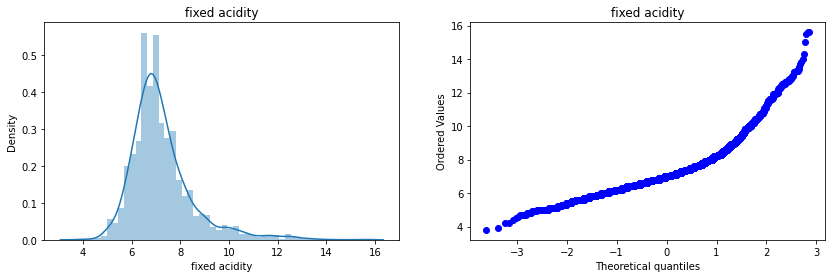

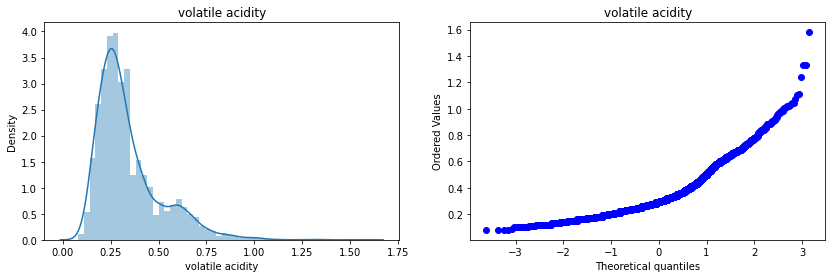

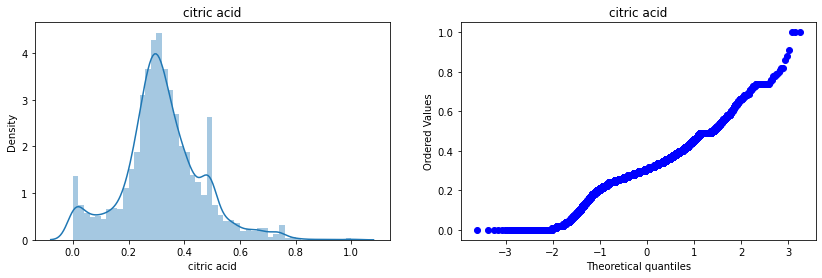

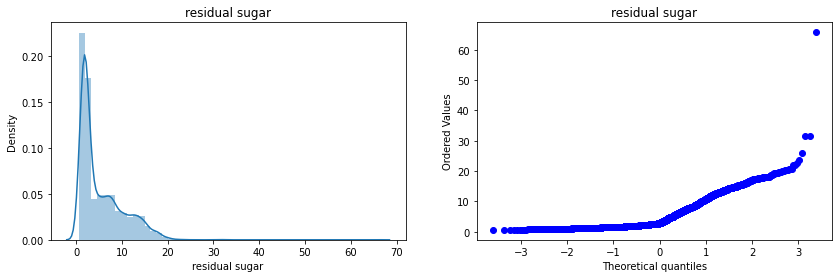

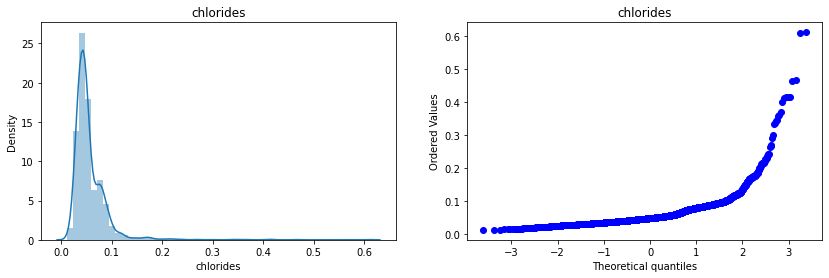

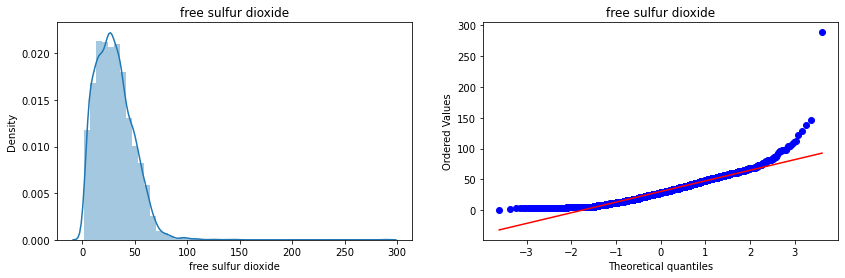

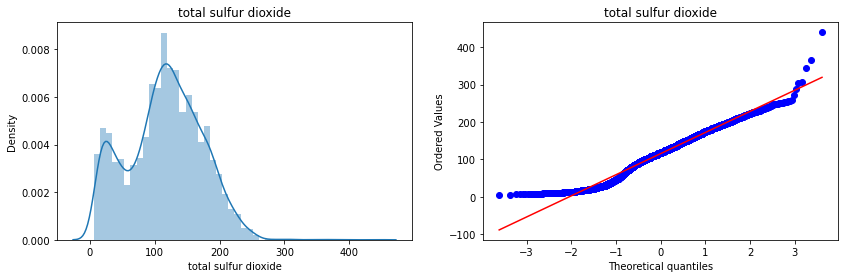

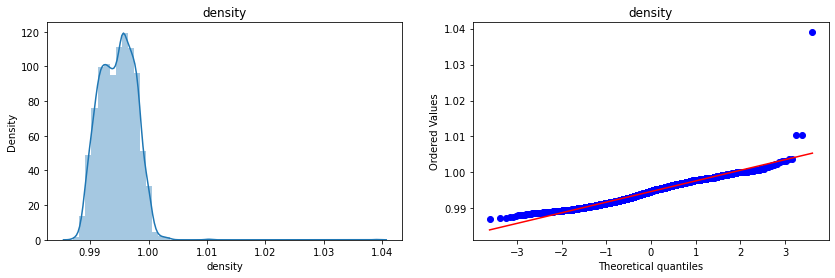

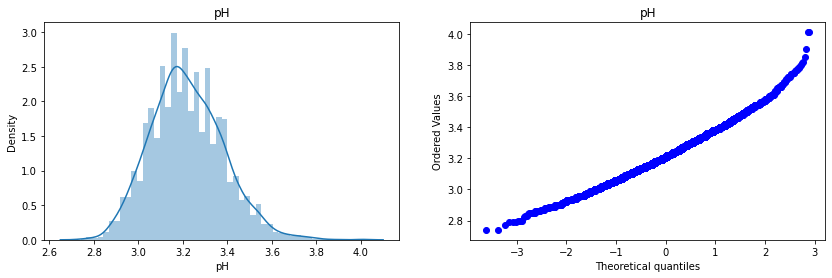

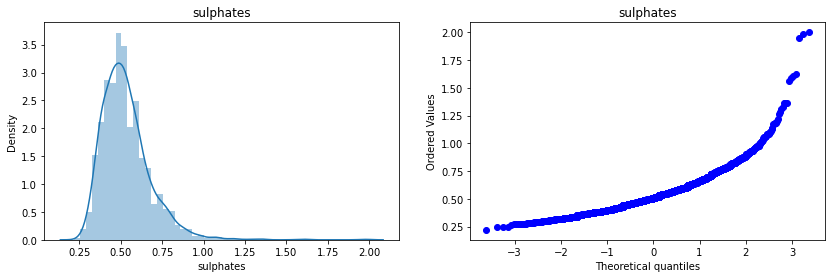

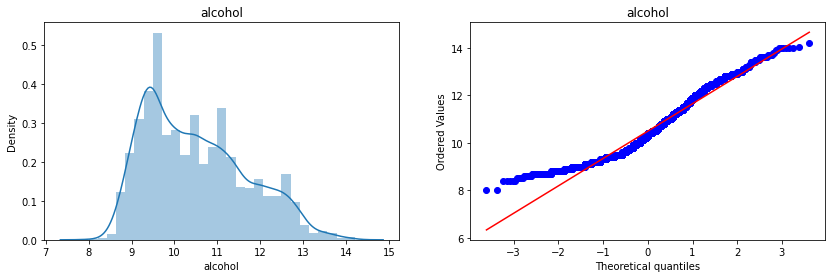

In [442]:
# Plotting the distplots without any transformation

for col in X_train1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train1[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [443]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'best_quality'],
      dtype='object')

In [444]:
transformer1  = ColumnTransformer( transformers = [
    ('trf1' , SimpleImputer() , ['fixed acidity' , 'volatile acidity' ,'citric acid', 'residual sugar' , 'chlorides', 'pH' , 'sulphates' ] ),
    ('trf2' , OneHotEncoder(sparse = False) , ['type'])
]  , remainder = 'passthrough')

In [445]:
X_train_transformed = transformer1.fit_transform(X_train)
X_test_transformed = transformer1.transform(X_test)

In [446]:
print(X_train_transformed.shape , X_test_transformed.shape)

(4547, 13) (1950, 13)


In [447]:
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed  = pd.DataFrame(X_test_transformed)

In [448]:
np.round(X_train_transformed.describe() , 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0
mean,7.2,0.3,0.3,5.4,0.1,3.2,0.5,0.2,0.8,30.4,115.5,1.0,10.5
std,1.3,0.2,0.1,4.7,0.0,0.2,0.2,0.4,0.4,17.9,57.0,0.0,1.2
min,3.8,0.1,0.0,0.6,0.0,2.7,0.2,0.0,0.0,1.0,6.0,1.0,8.0
25%,6.4,0.2,0.2,1.8,0.0,3.1,0.4,0.0,1.0,17.0,77.0,1.0,9.5
50%,7.0,0.3,0.3,2.9,0.0,3.2,0.5,0.0,1.0,29.0,118.0,1.0,10.3
75%,7.7,0.4,0.4,8.0,0.1,3.3,0.6,0.0,1.0,41.0,156.0,1.0,11.3
max,15.6,1.6,1.0,65.8,0.6,4.0,2.0,1.0,1.0,289.0,440.0,1.0,14.2


In [449]:
np.round(X_test_transformed.describe() , 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
mean,7.2,0.3,0.3,5.6,0.1,3.2,0.5,0.2,0.8,30.9,116.3,1.0,10.5
std,1.2,0.2,0.2,4.8,0.0,0.2,0.1,0.4,0.4,17.5,55.4,0.0,1.2
min,4.4,0.1,0.0,0.8,0.0,2.7,0.2,0.0,0.0,1.0,6.0,1.0,8.5
25%,6.4,0.2,0.2,1.8,0.0,3.1,0.4,0.0,1.0,17.0,78.0,1.0,9.5
50%,7.0,0.3,0.3,3.6,0.0,3.2,0.5,0.0,1.0,29.0,118.0,1.0,10.3
75%,7.6,0.4,0.4,8.3,0.1,3.3,0.6,0.0,1.0,42.0,156.0,1.0,11.3
max,15.9,1.2,1.7,26.0,0.4,3.9,2.0,1.0,1.0,131.0,313.0,1.0,14.9


In [450]:
scaler = StandardScaler()

In [451]:
X_train_transformed1 = scaler.fit_transform(X_train_transformed)

In [452]:
X_test_transformed1 = scaler.transform(X_test_transformed)

In [453]:
print(X_train_transformed1.shape , X_test_transformed1.shape)

(4547, 13) (1950, 13)


In [454]:
X_train_transformed1 = pd.DataFrame(X_train_transformed1)
X_test_transformed1 = pd.DataFrame(X_test_transformed1)

In [455]:
np.round(X_train_transformed1.describe() , 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0,4547.0
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.6,-1.6,-2.2,-1.0,-1.3,-2.9,-2.1,-0.6,-1.7,-1.6,-1.9,-2.5,-2.1
25%,-0.6,-0.7,-0.5,-0.8,-0.5,-0.7,-0.7,-0.6,0.6,-0.7,-0.7,-0.8,-0.8
50%,-0.2,-0.3,-0.1,-0.5,-0.3,-0.1,-0.2,-0.6,0.6,-0.1,0.0,0.0,-0.2
75%,0.4,0.4,0.5,0.6,0.3,0.6,0.4,-0.6,0.6,0.6,0.7,0.8,0.7
max,6.3,7.4,4.8,12.7,15.8,4.8,9.7,1.7,0.6,14.5,5.7,14.7,3.1


In [456]:
np.round(X_test_transformed1.describe() , 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
mean,-0.1,-0.0,0.0,0.1,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
std,0.9,1.0,1.1,1.0,1.0,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-1.5,-2.2,-1.0,-1.3,-3.1,-2.0,-0.6,-1.7,-1.6,-1.9,-2.5,-1.7
25%,-0.6,-0.7,-0.5,-0.8,-0.5,-0.7,-0.7,-0.6,0.6,-0.7,-0.7,-0.8,-0.8
50%,-0.2,-0.3,-0.1,-0.4,-0.3,-0.1,-0.2,-0.6,0.6,-0.1,0.0,0.1,-0.2
75%,0.3,0.4,0.5,0.6,0.2,0.6,0.4,-0.6,0.6,0.7,0.7,0.8,0.7
max,6.6,5.1,9.4,4.4,10.4,4.2,9.4,1.7,0.6,5.6,3.5,2.8,3.7


In [458]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [459]:
clf1.fit(X_train_transformed1 , y_train)

LogisticRegression()

In [460]:
clf2.fit(X_train_transformed1 , y_train)

DecisionTreeClassifier()

In [461]:
y_pred1 = clf1.predict(X_test_transformed1)
y_pred2 = clf2.predict(X_test_transformed1) 

In [463]:
print('model 1 score:' , accuracy_score(y_test , y_pred1)*100)
print('model 2 score:' , accuracy_score(y_test , y_pred2)*100)

model 1 score: 73.6923076923077
model 2 score: 77.07692307692308
